# Introduction

As we all know, with the advent of mobile internet access for all, the world has moved from MP3 downloaded songs to streaming services. A streaming service maybe paid/unpaid subscription that lets you stream songs with a stable internet connection on your device. A paid subscription also lets you download songs on to your device to be listened to anytime even with your internet connection.

Currently, Spotify and Apple Music are the top two streaming services available. Apple Music is primarily used by iOS/MacOS users while Spotify is used by any platform using internet services. Currently, as of 2020, Spotify has about 130 million subscribers compared to Apple Music with 75 million subscribers.

Hence, we can say Spotify is the leading music service by quite a distance. These music streams use curated playlists through various ML recommendation systems that keep feeding you with interesting songs and hence, keeping you interested in their services constantly.

Through this kernel, we would like to analyse the top 50 songs published by Spotify in 2019. We will check the various genres, popularity and some other features that made the songs to famous amongst the users.

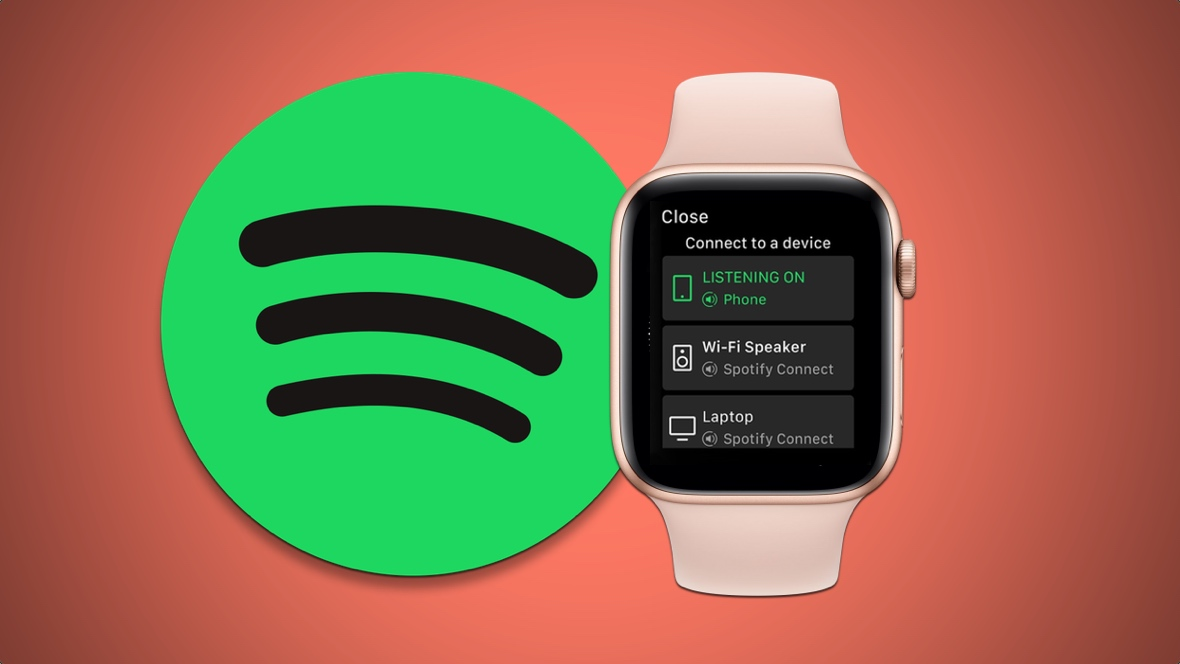

# Importing the relevant libraries and dataset

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
df=pd.read_csv('../input/top50spotify2019/top50.csv',encoding='latin_1',index_col=0)
df.head()

As we can see from the above graph above, we have various features such as Beats per min, genre, Energy, Danceability,Loudness, etc. to see how the songs stack up against each other. Since the data is quite detailed and clean, we will not try to wrangle with the data anymore. Hence, we shall directly head to data visualisation section.

# Data Visualisation


## a) Top Artists of 2019

Let us check which artists featured most frequently in the top 50 songs. We will try to obtain the top 10 most popular artists of 2019.

In [ ]:
df['Count']=1
df_artist=df.groupby('Artist.Name')['Count'].sum().reset_index().sort_values(by='Count',ascending=False)
df_artist.head(10)

In [ ]:
sns.catplot('Artist.Name','Count',data=df_artist.head(10),kind='bar',height=8,aspect=2,palette='winter')
plt.title('Top 10 artists of 2019',size=25)
plt.xlabel('Artist name',size=15)
plt.ylabel('Number of songs in top 50',size=15)
plt.xticks(size=15,rotation=45)

As we can see from the plot above, Ed Sheeran performed the best with 4 songs in the top 50 charts. The notable other artists with more than 1 song have been shown above. All other artists had not more than 1 song in the top 50.


## b) Top Genres of 2019

Let us now check which genre of songs made it the most to the most to the top 50. This gives us a good idea of which genres are the most popular ones.

In [ ]:
df_genre=df.groupby('Genre')['Count'].sum().reset_index().sort_values(by='Count',ascending=False)
df_genre.head()

Let us visualise the above data into a pie plot as shown below.

In [ ]:
fig=px.pie(df_genre,values='Count',names='Genre',hole=0.4)
fig.update_layout(title='Top genres of 2019',title_x=0.45,annotations=[dict(text='Genre',font_size=20, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

## c) Top 10 tracks of 2019

Let us check the top 10 tracks of 2019 based on popularity rating.

In [ ]:
df_top_tracks=df.sort_values(by='Popularity',ascending=False).head(10).reset_index(drop=True)
df_top_tracks.index=df_top_tracks.index + 1
df_top_tracks

As we can see, the most popular song of 2019 is Bad Guy by Billie Eilish.

Let us check the technical aspects of the top 10 songs.

In [ ]:
sns.set()
df_top_tracks.plot.area(y=['Beats.Per.Minute', 'Energy',
       'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.',
       'Acousticness..', 'Speechiness.'],alpha=0.4,figsize=(15,12),stacked=True)
plt.title('Technical variations of top 10 songs',size=20)
plt.xlabel('Track number')



The track number matches with the dataframe shown above for top 10 songs.

We can conclude that the :

* Loudness variation was low
* Variations in beat per min was high
* Energy variation was fairly low
* Danceability variation was low
* Valence variation was high
* Acousticeness variation was high
* Speechiness variation was high


Let us try to visualise the distribution of some of the features using plots.


In [ ]:
sns.set(style='darkgrid')
fig2=plt.figure(figsize=(10,8))
ax1=fig2.add_subplot(221)
sns.boxplot('Beats.Per.Minute',data=df_top_tracks,orient='v',ax=ax1)

ax2=fig2.add_subplot(222)
sns.boxplot('Valence.',data=df_top_tracks,orient='v',ax=ax2,color='indianred')

ax3=fig2.add_subplot(223)
sns.boxplot('Acousticness..',data=df_top_tracks,orient='v',ax=ax3,color='green')

ax4=fig2.add_subplot(224)
sns.boxplot('Speechiness.',data=df_top_tracks,orient='v',ax=ax4,color='yellow')

These were the four features that had high variance. As a result, the inter quartile boxes are large. The horizontal lines on the boxes show the median values of each feature.


## d) Correlation heatmap with popularity

Let us check how the various features are correlated with each other using a heatmap.

In [ ]:
plt.figure(figsize=(10,8))
corr_songs=df.iloc[:,:-1].corr()
sns.heatmap(corr_songs,annot=True,fmt='.2f',cmap='rocket')

From the heatmap above, following conclusions maybe drawn:

* Speechiness and Beats per min have a good correlation.
* Loudness and energy of the song have a high correlation.
* Valence and energy also seem to have a good correlation.


## e) Track length

Let us check how the track lengths are changing for the tracks.

In [ ]:
fig3=px.line(df,y='Length.',x='Track.Name',height=800, width=1000)
fig3.update_layout(title='Length of top songs',title_x=0.5,plot_bgcolor="black")

fig3.update_xaxes(visible=False)
fig3.show()

## f) Correlation between energy and loudness

Let us check the correlation using a kdeplot.

In [ ]:
sns.jointplot(x='Loudness..dB..',y='Energy',data=df,kind='kde',color='green')

## g) Correlation between BPM and Speechiness

In [ ]:
sns.jointplot(x='Beats.Per.Minute',y='Speechiness.',data=df,kind='kde',color='red')

# If you found this notebook helpful, an upvote would be great ! :)